In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

import hickle as hkl
from torch.nn import Softmax

from InflGame.utils.general import *
import InflGame.domains.rd as rd
from InflGame.utils.data_management import *

from InflGame.MARL.MARL_plots import *
from InflGame.MARL.sync_game import influencer_env_sync
from InflGame.MARL.IQL_sync import IQL_sync
from InflGame.MARL.utils.IQL_utils import *
from InflGame.MARL.utils.MARL_utils import *
from InflGame.MARL.utils.my_parse import add_rl_example_script_args


from InflGame.MARL.utils.experiments import run_experiment


In [2]:
resource_parameters_gaussian=[[.1,.1],[.25,.75],[1,1]] #[[sd1, sd2,], [mean1,mean2], [factor1,factor2]]
#actual resource distribution

bin_points=np.linspace(.001, .999, 100)
resource_distribution2=rd.resource_distribution_choice(bin_points=bin_points,resource_type='multi_modal_gaussian_distribution_1D',resource_parameters=resource_parameters_gaussian)

In [9]:
parser = add_rl_example_script_args(default_reward=1, default_iters=50, default_timesteps=100000)
parser.set_defaults(
    enable_new_api_stack=True,
    resource_distribution=resource_distribution2,
)
R=0.1
cshift=np.exp(-1/2*(bin_points-0)**2/R**2)+np.exp(-1/2*(bin_points-1)**2/R**2)


args=parser.parse_args(args=[])
env_config_main={"num_agents": 4,"initial_position":np.array([.1,.4,.6,.9]),"bin_points":args.bin_points,"resource_distribution":args.resource_distribution,
                 "step_size":.1,"infl_configs":args.infl_configs,"parameters":np.array([1,1,1,1]),"domain_type":args.domain_type,
                 "domain_bounds":args.domain_bounds,"fixed_pa":args.fixed_pa,"infl_cshift":False,"cshift":cshift,"infl_fshift":False,"Q":0,
                 "NUM_ITERS":100,"normalize_reward":True}
env=influencer_env_sync(config=env_config_main)

In [10]:
episode_configs={"TYPE":"fixed","episode_max":20000,"episode_min":10}
temperature_configs={"TYPE":"fixed","temperature":0.5}
epsilon_configs={"TYPE":"fixed","epsilon":0.1}


In [11]:
q_tensor=run_experiment(action_type='sync',
               env_configs=env_config_main,
               trials=100,
               gamma=.5,
               alpha=.005,
               epochs=0,
               random_seed=0,
               random_initialization=False,
               smoothing=False,
               temperature_configs=temperature_configs,
               epsilon_configs=epsilon_configs,
               episode_configs=episode_configs,
               resource_name="gauss_mix_2m",
               name_ads=["test","No_epochs"],
               checkpoints=False,
               save_positions=True,
               algo_epoch=False 
)

Trial: 1/100 complete
Trial: 2/100 complete
Trial: 3/100 complete
Trial: 4/100 complete
Trial: 5/100 complete
Trial: 6/100 complete
Trial: 7/100 complete
Trial: 8/100 complete
Trial: 9/100 complete
Trial: 10/100 complete
Trial: 11/100 complete
Trial: 12/100 complete
Trial: 13/100 complete
Trial: 14/100 complete
Trial: 15/100 complete
Trial: 16/100 complete
Trial: 17/100 complete
Trial: 18/100 complete
Trial: 19/100 complete
Trial: 20/100 complete
Trial: 21/100 complete
Trial: 22/100 complete
Trial: 23/100 complete
Trial: 24/100 complete
Trial: 25/100 complete
Trial: 26/100 complete
Trial: 27/100 complete
Trial: 28/100 complete
Trial: 29/100 complete
Trial: 30/100 complete
Trial: 31/100 complete
Trial: 32/100 complete
Trial: 33/100 complete
Trial: 34/100 complete
Trial: 35/100 complete
Trial: 36/100 complete
Trial: 37/100 complete
Trial: 38/100 complete
Trial: 39/100 complete
Trial: 40/100 complete
Trial: 41/100 complete
Trial: 42/100 complete
Trial: 43/100 complete
Trial: 44/100 comple

In [6]:
test={'player0': 9, 'player1': 6}

In [7]:
observation_to_position(observations=test, possible_positions=[0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1.0])

[0.9, 0.6]

In [8]:
policy_histogram(q_tensor=q_mean,temperature=.01)

NameError: name 'q_mean' is not defined

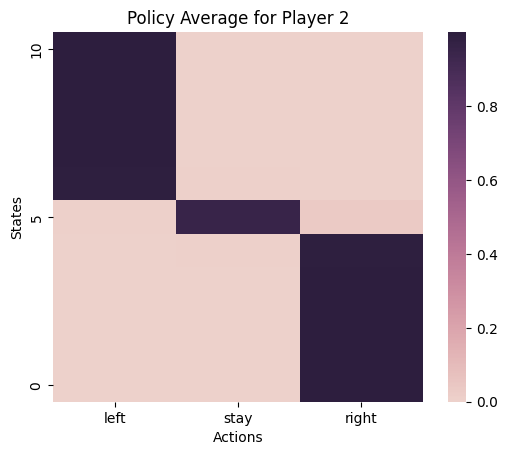

In [ ]:
policy_histogram(q_tensor=q_mean,agent_id=1,temperature=.01)

In [ ]:
pos_matrix, reward_matrix=policy_determinsiticly_to_actions(env=influencer_env_sync(env_config_main),q_tensor=q_mean,intial_postion=np.array([.1,.2,.3,.8]),num_step=100,temperature=0.5)

NameError: name 'policy_determinsiticly_to_actions' is not defined

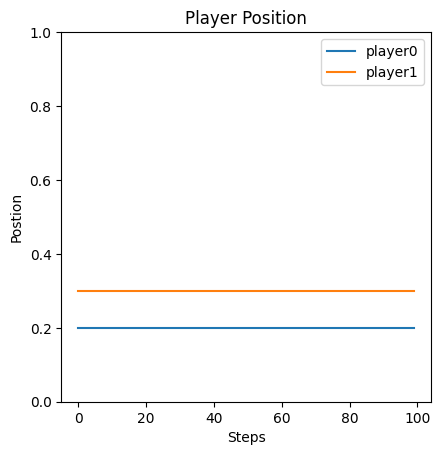

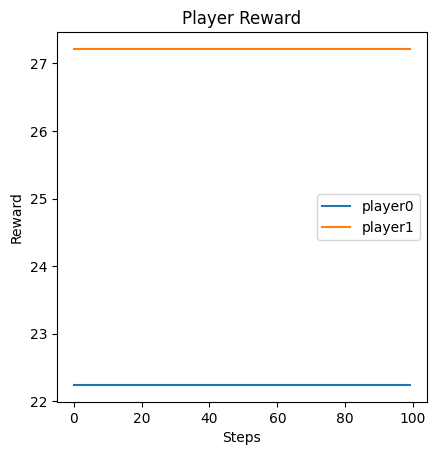

In [ ]:
pos_plot(pos_matrix=pos_matrix,possible_agents=env.possible_agents,bounds=env.domain_bounds)
reward_plot(reward_matrix=reward_matrix,possible_agents=env.possible_agents)